## Students Performance Indicator

#### Life cycle of Machine learning Project

* Understanding the Problem Statement
* Data Collection
* Data Checks to Perform
* Exploratory data analysis
* Data Pre-Preprocessing
* Model Training
* Choose best model

#### 1) Problem statement

* This project aims to explore how factors such as gender, ethnicity, parental education level, lunch, and test preparation courses influence students' academic performance.

#### 2) Data Collection

* Data Source - [Dataset](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download)
* The data consists of 8 column and 1000 rows.

#### 2.1 Import Data and Required Packages

##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warning Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

##### Import Data as Pandas DataFrame

In [2]:
df=pd.read_csv("Data/StudentsPerformance.csv")

##### Show the top 5 rows

In [3]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Shape of the dataset

In [4]:
df.shape

(1000, 8)

##### 2.2 Dataset information

* gender: sex of students -> (Male/Female)
* race/ethnicity: ethnicity of students -> (Group A, B,C,D,E)
* parental level of education: Parent's final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
* lunch: having lunch before test  -> (standard or free/reduced)
* test preparation course: complete or not complete before test
* math score 
* reading score 
* writing score 

#### 3. Data Checks to perform

* Check Missing values
* Check Duplicates
* Check types
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

##### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are missing values in the dataset

##### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

There are no duplicated values

##### 3.3 Check types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### 3.4 Check the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

##### 3.5 Check statics of the dataset

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight 

* From the descriptive statistics on the numerical data, the means are closely related - between 66 and 68.
* The standard deviations are also close - 14.6 and 15.19
* Meanwhile, Math saw a minimum score of 0, writing and read scores recorded 10 and 17 respectively. 

##### 3.6 Exploring Data

In [10]:
print("Categories in 'gender' variable: ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [11]:
# Define categorical & numerical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print("We have {} numerical features : {}".format(len(numerical_features), numerical_features))
print("We have {} categorical features : {}".format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### 3.8 Adding columns for "Total Score" and "Average"

In [12]:
df['Total Score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['Total Score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of student with 100% marks in Reading: {reading_full}')
print(f'Number of student with 100% marks in Writing: {writing_full}')
print(f'Number of student with 100% marks in Maths: {reading_full}')

Number of student with 100% marks in Reading: 17
Number of student with 100% marks in Writing: 14
Number of student with 100% marks in Maths: 17


In [14]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of student with less than 20 marks in Reading: {reading_less_20}')
print(f'Number of student with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of student with less than 20 marks in Maths: {math_less_20 }')

Number of student with less than 20 marks in Reading: 1
Number of student with less than 20 marks in Writing: 3
Number of student with less than 20 marks in Maths: 4


##### Insights

* From the above values we realized that students perform worst in Math
* Students' performance was best in Reading

## Exploring Data (Visualization)

#### 4.1 Visualize average score distribution


* Histogrm
* Kernel Distribution Function (KDE)

##### 4.1.1 Histogram & KDE

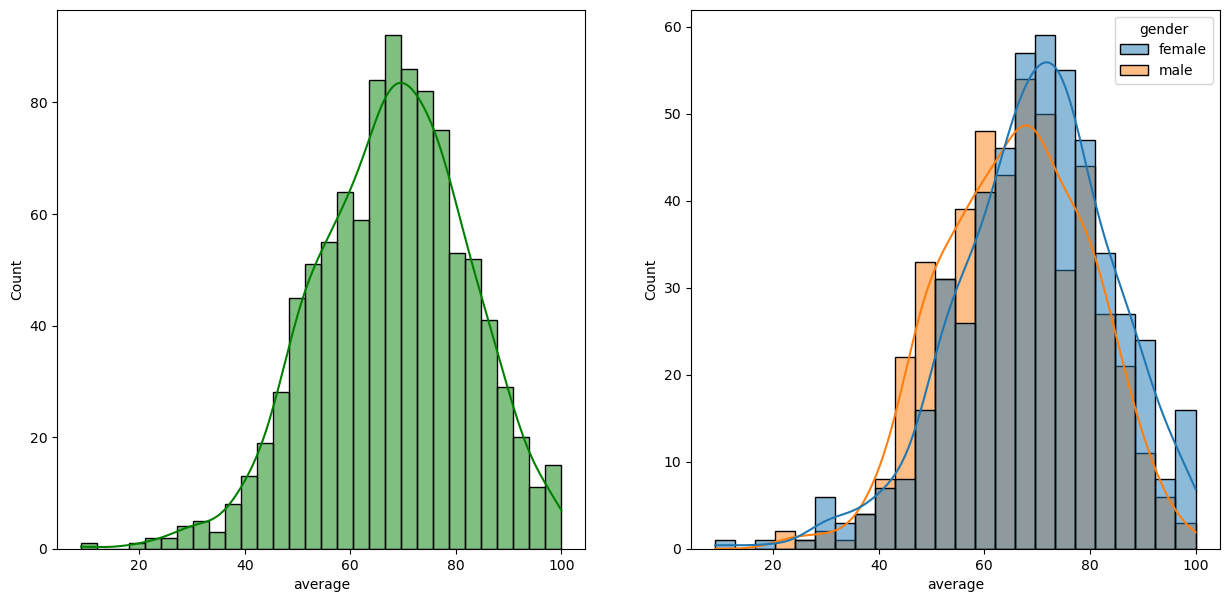

In [22]:
fig,axs = plt.subplots(1, 2, figsize =(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()


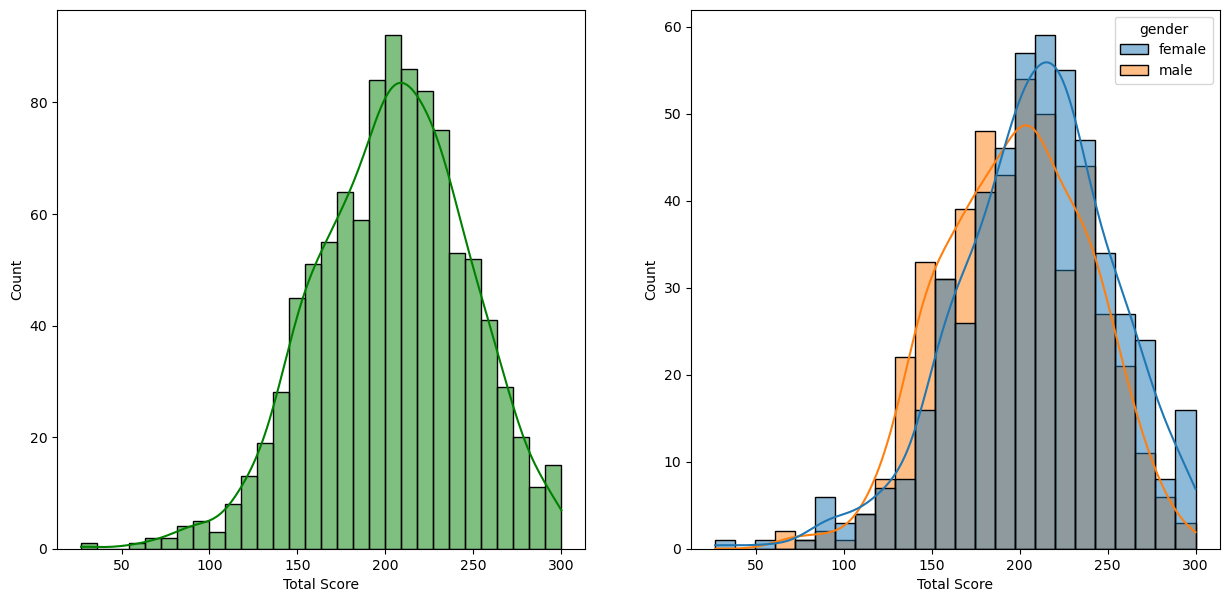

In [21]:
fig,axs = plt.subplots(1, 2, figsize =(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total Score',kde=True,hue='gender')
plt.show()

Insight

* Female students tend to perform well than male students

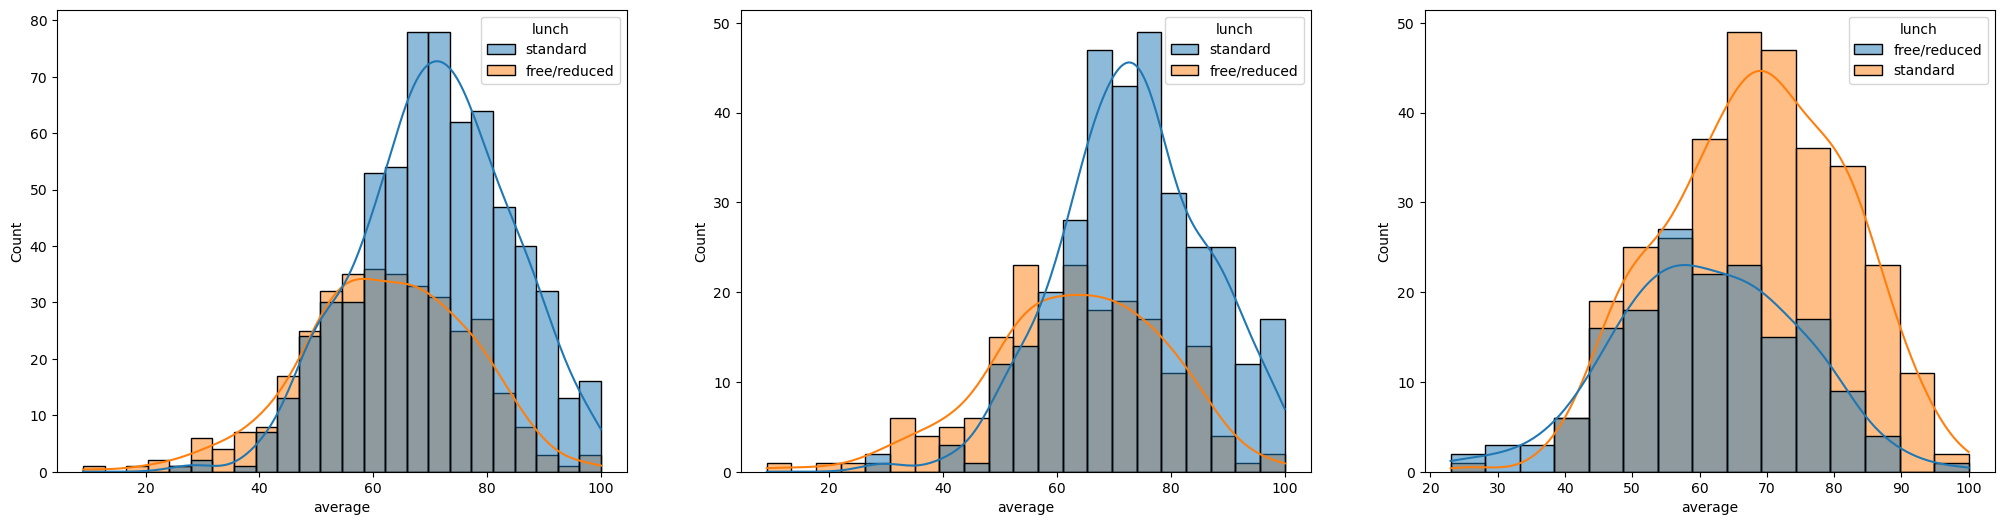

In [24]:

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# Plot the first histogram
sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axes[0])

# Plot the second histogram for females
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch', ax=axes[1])


# Plot the third histogram for males
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch', ax=axes[2])

# Show the plots
plt.show()

Insight
* Students that take lunch before test perform far better than those who dont take lunch before test.

##### Univariate Analysis

Performing Univariate Analysis on each column

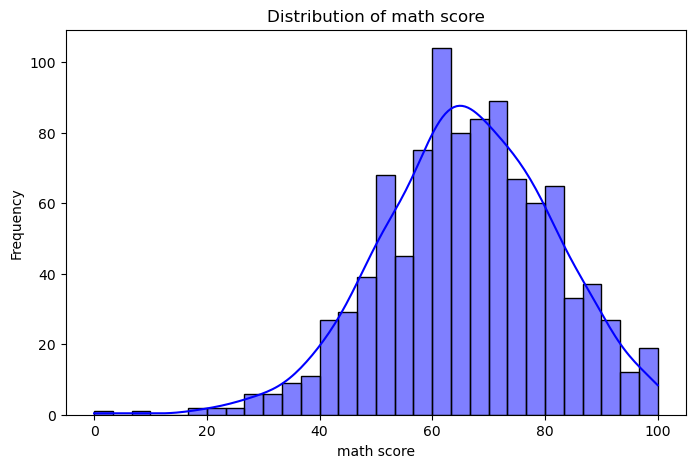

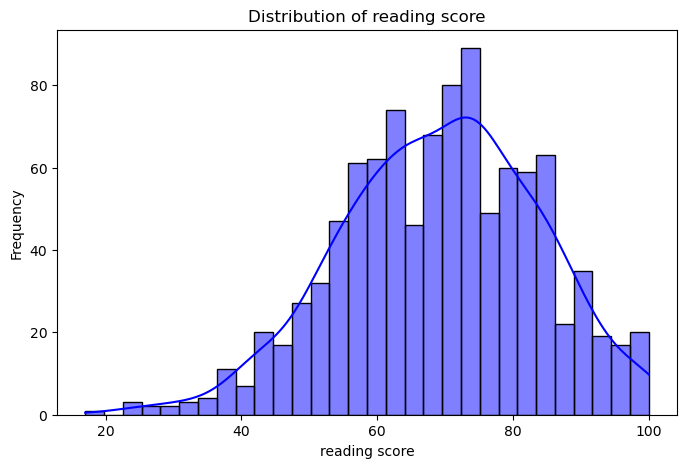

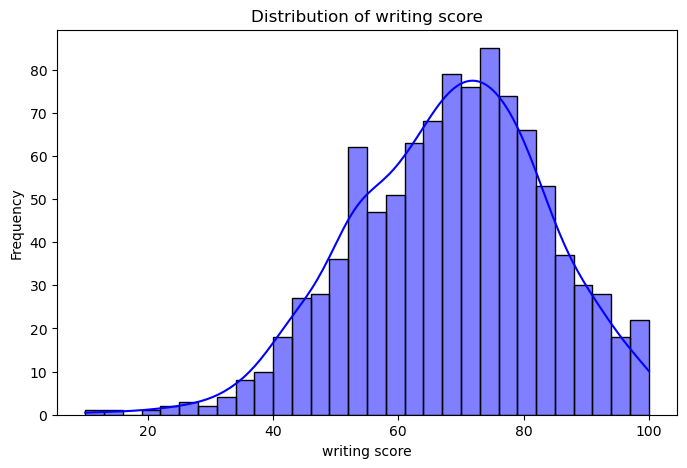

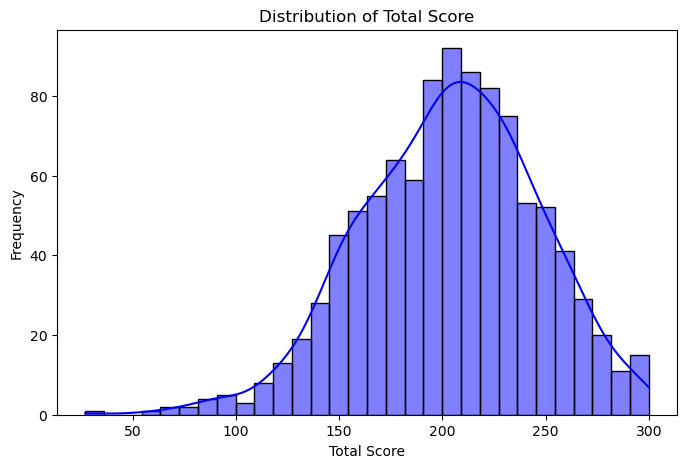

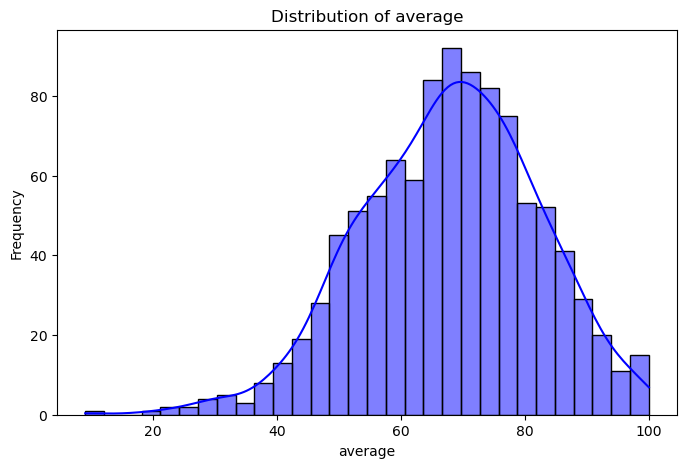

In [25]:
# Univariate Analysis for Numerical Features
numerical_features = ['math score', 'reading score', 'writing score', 'Total Score', 'average']

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

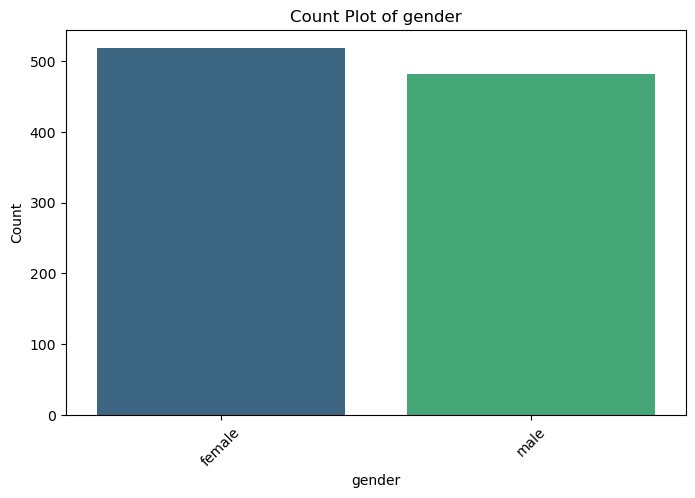

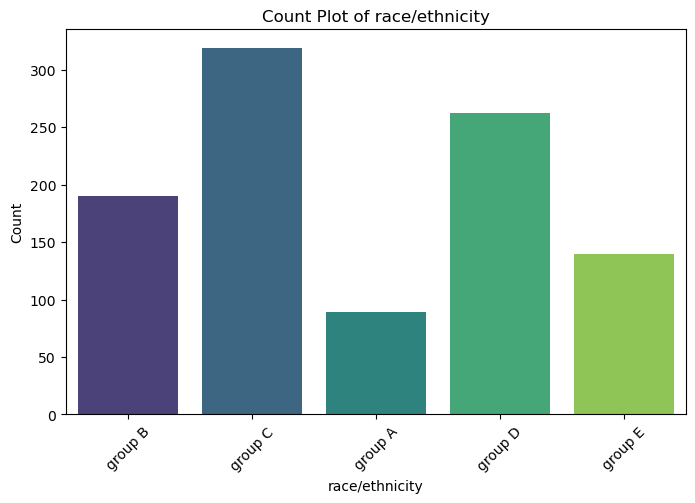

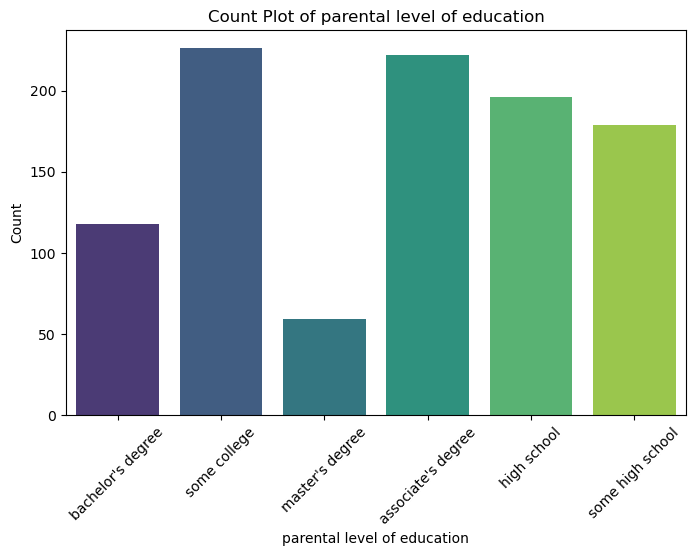

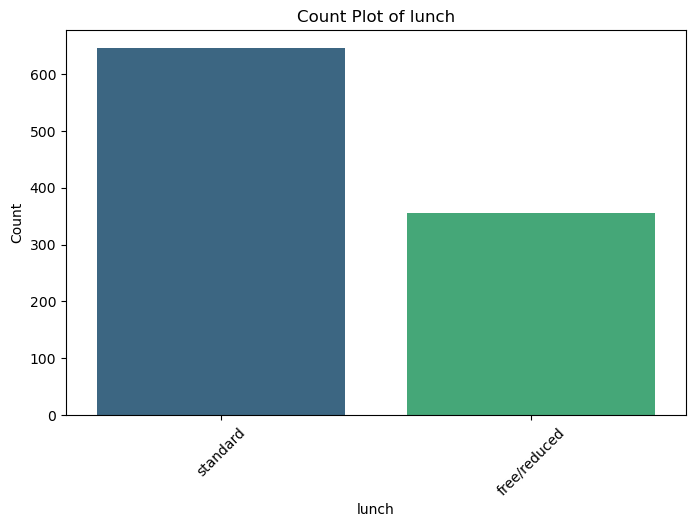

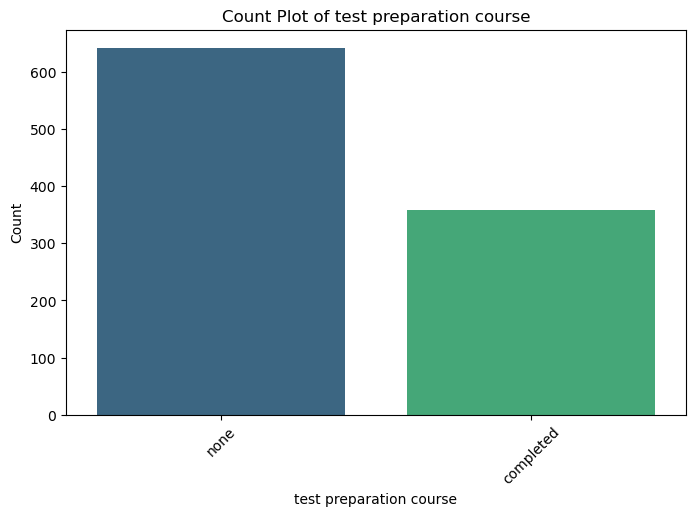

In [26]:
# Univariate Analysis for Categorical Features
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature, palette='viridis')
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

###### Explanation
* Numerical Features:

Histograms with KDE (Kernel Density Estimation) are plotted for numerical columns like math score, reading score, writing score, Total Score, and average.
These plots help visualize the distribution of scores and identify patterns like skewness or outliers.


* Categorical Features:

Count plots are used for categorical columns like gender, race/ethnicity, parental level of education, lunch, and test preparation course.
These plots show the frequency of each category, helping to understand the distribution of categorical variables.

##### Bivariate Analysis
To perform **bivariate analysis**, we analyze the relationship between two variables. Below is the code to generate bivariate analysis for both numerical and categorical variables using visualizations:

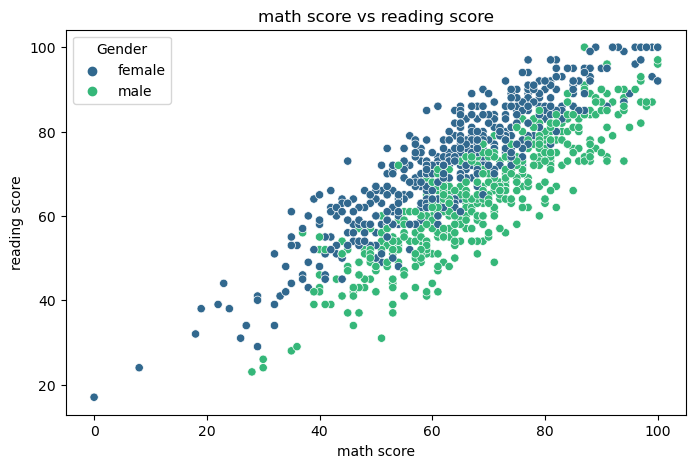

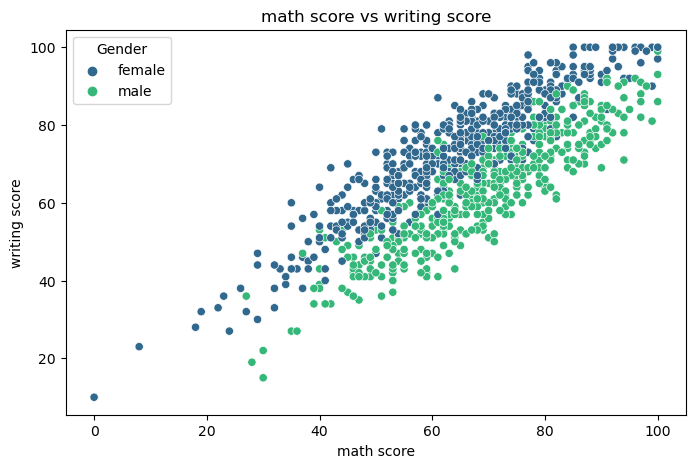

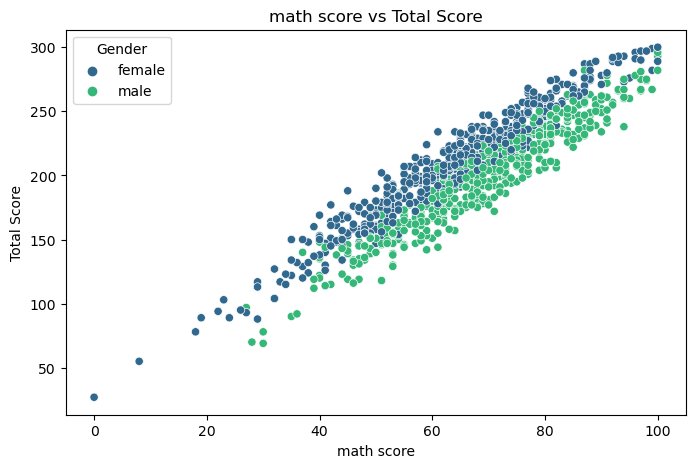

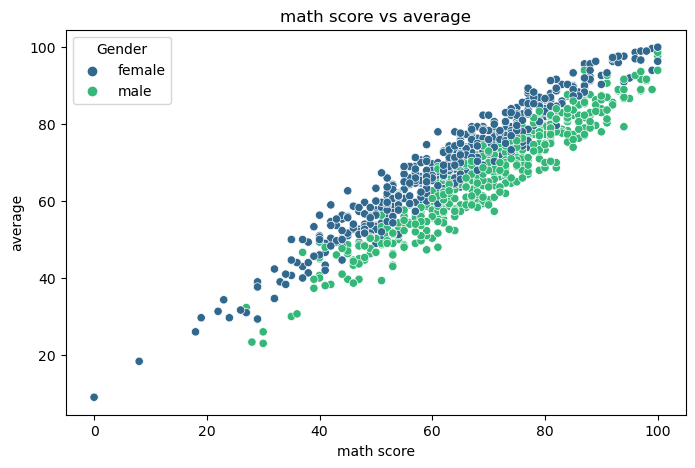

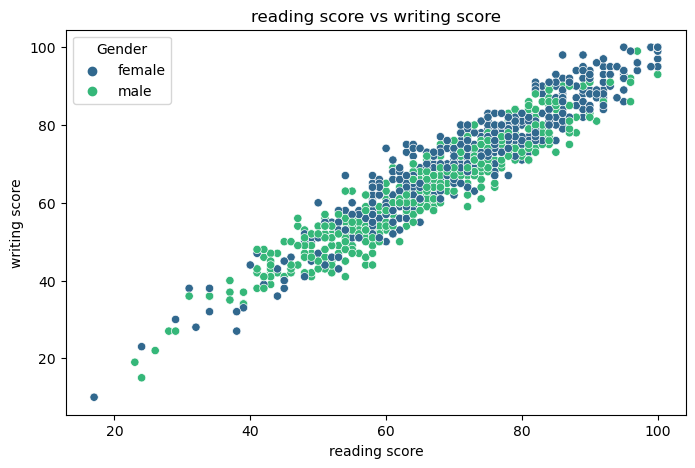

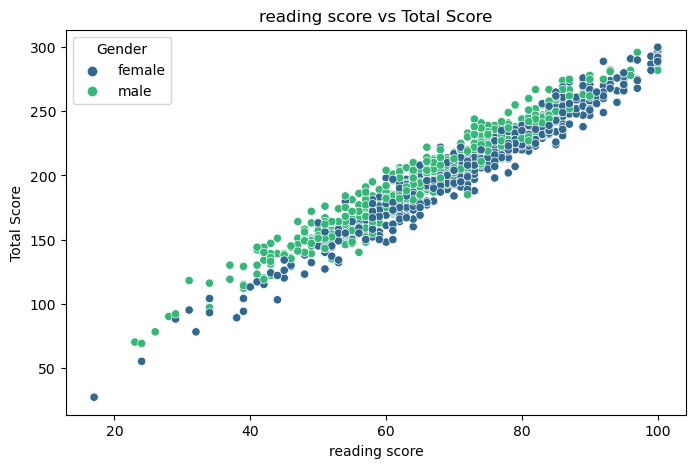

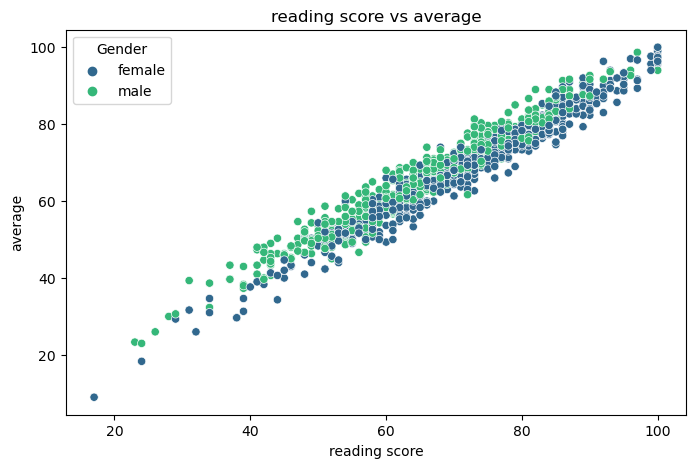

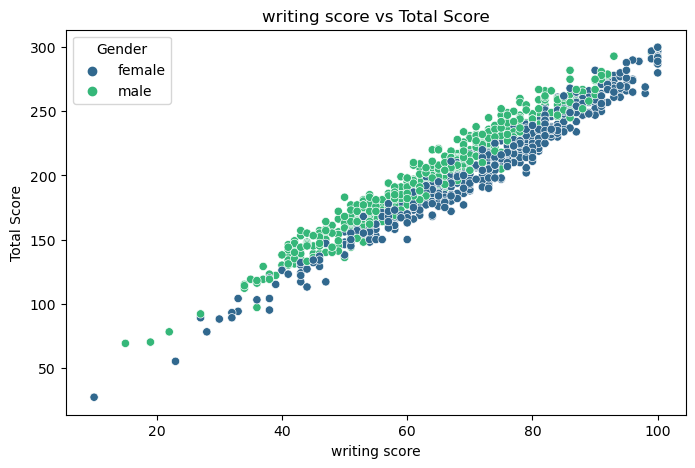

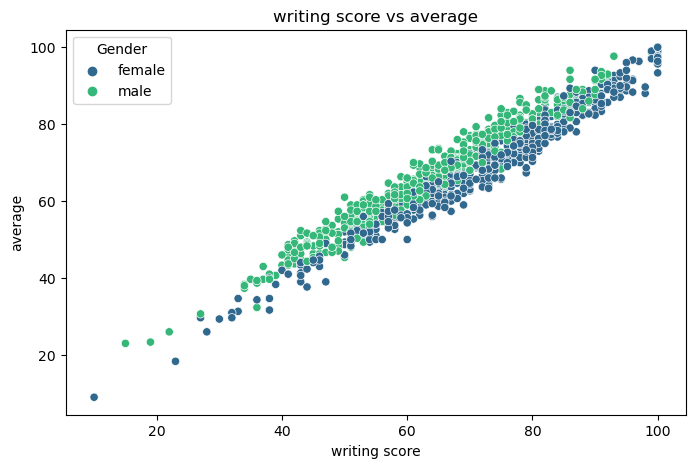

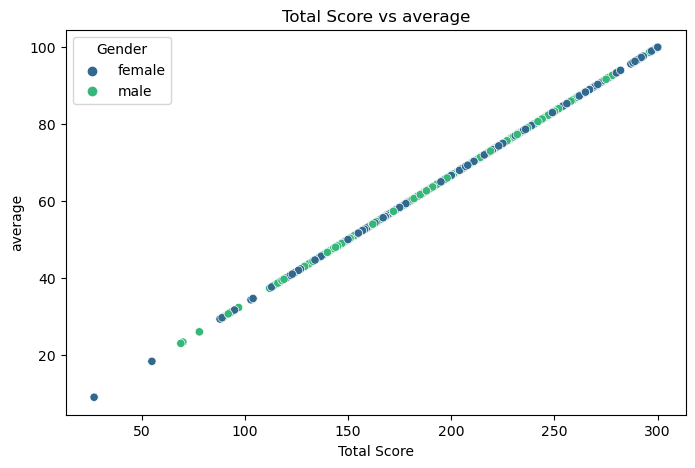

In [ ]:
#Numerical vs Numerical (Scatterplots)
numerical_features = ['math score', 'reading score', 'writing score', 'Total Score', 'average']

for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=df, x=numerical_features[i], y=numerical_features[j], hue='gender', palette='viridis')
        plt.title(f'{numerical_features[i]} vs {numerical_features[j]}')
        plt.xlabel(numerical_features[i])
        plt.ylabel(numerical_features[j])
        plt.legend(title='Gender')
        plt.show()

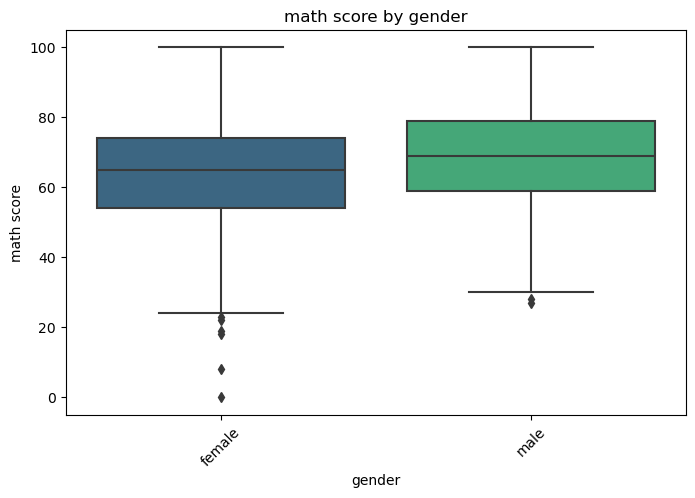

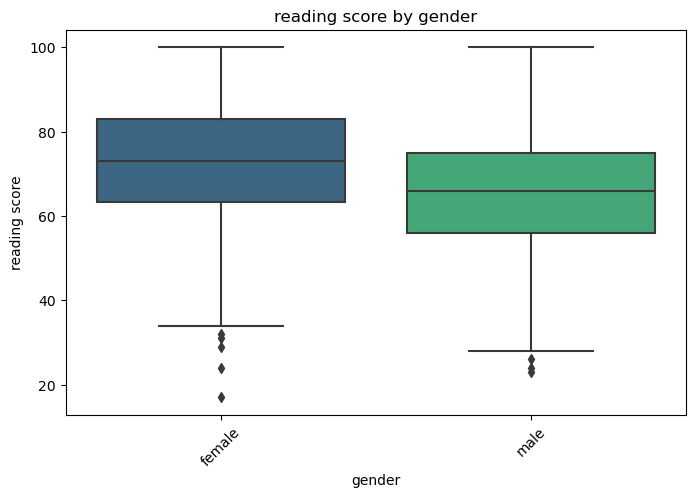

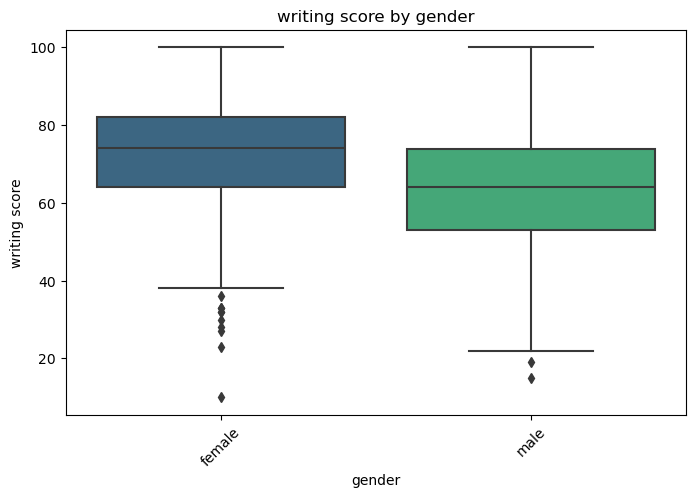

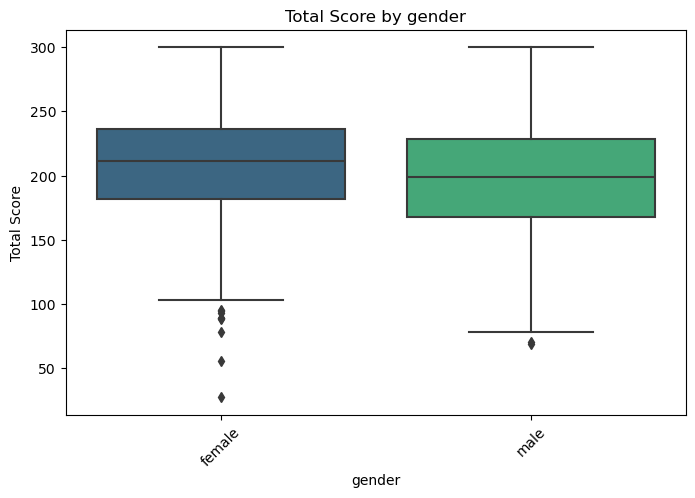

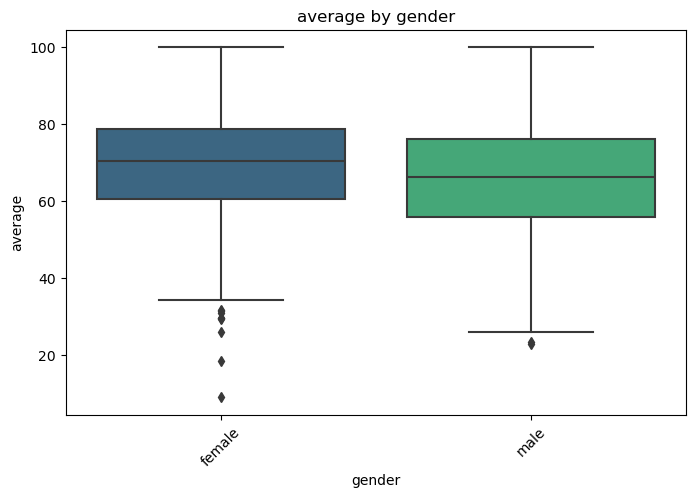

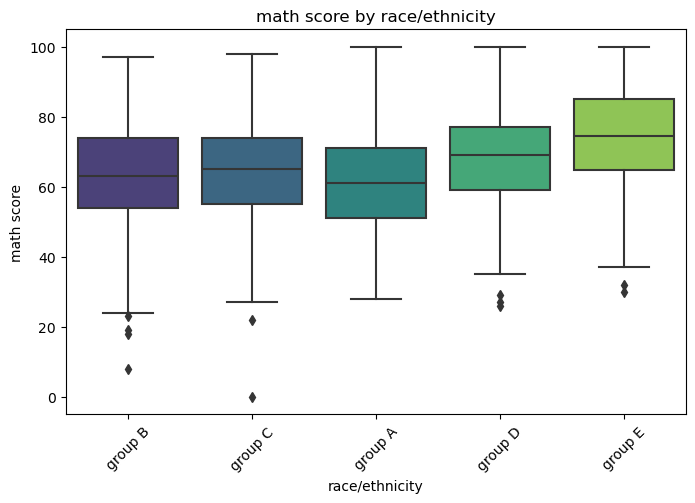

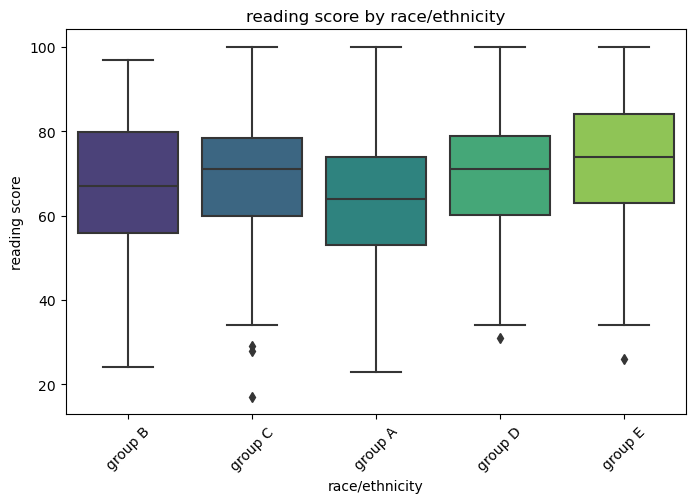

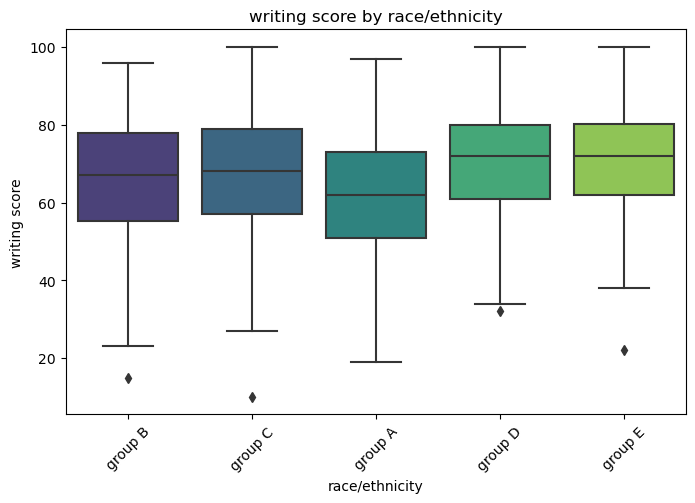

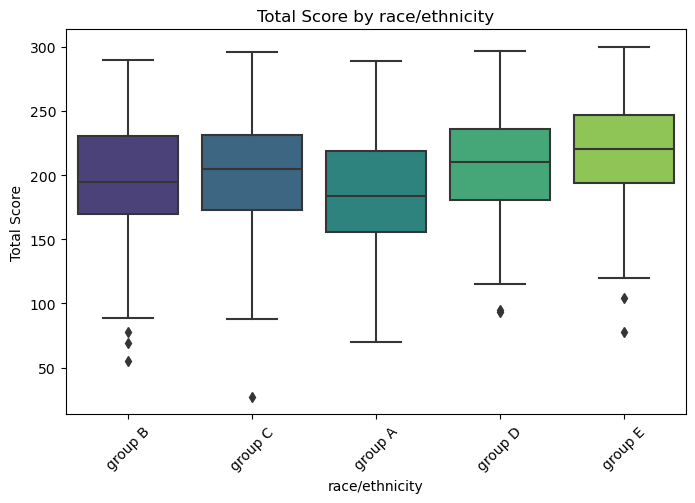

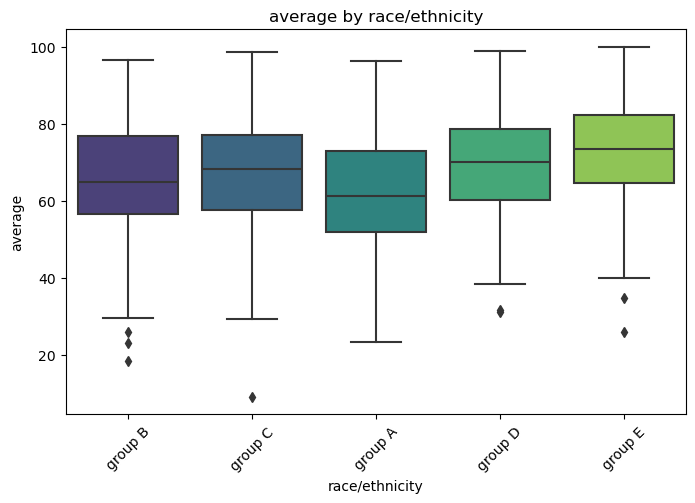

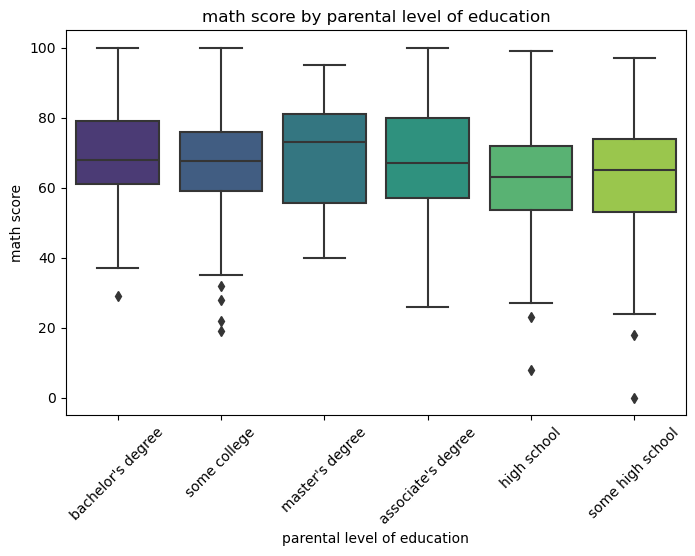

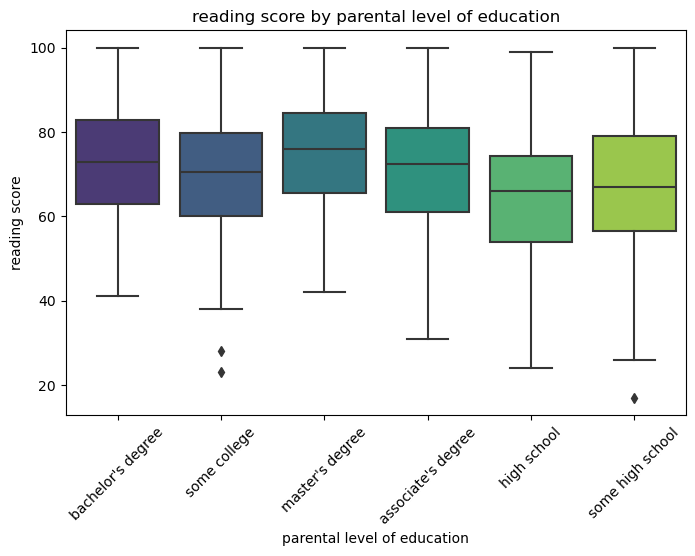

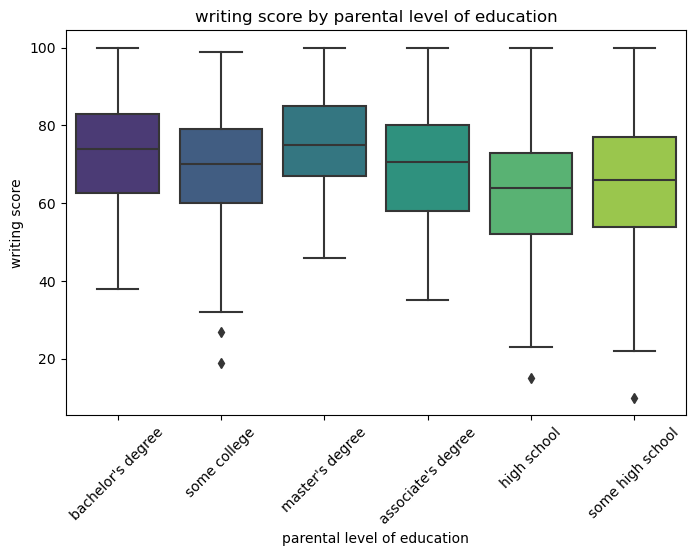

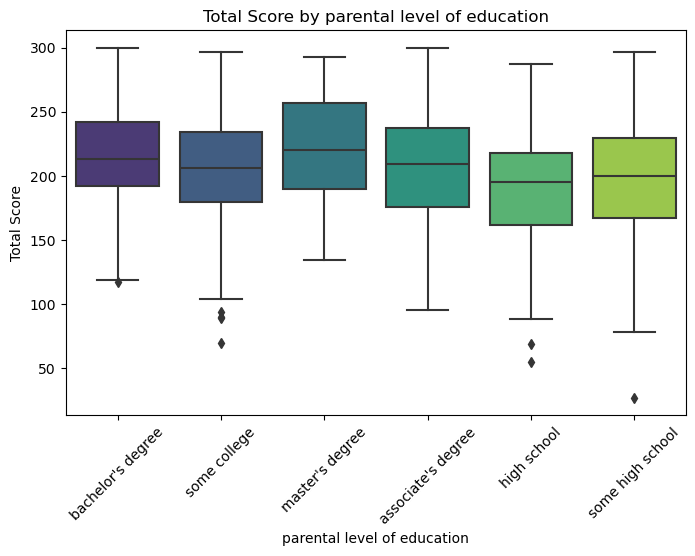

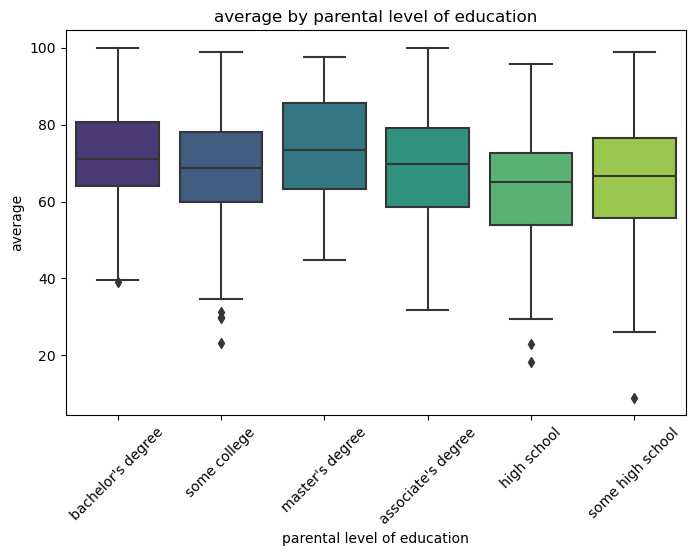

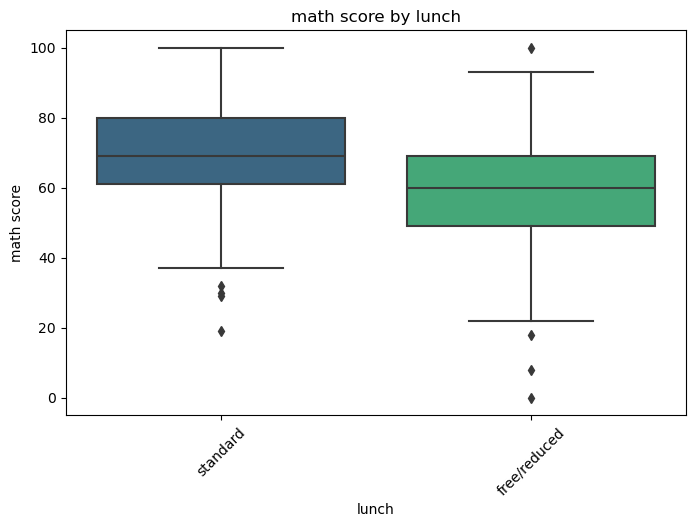

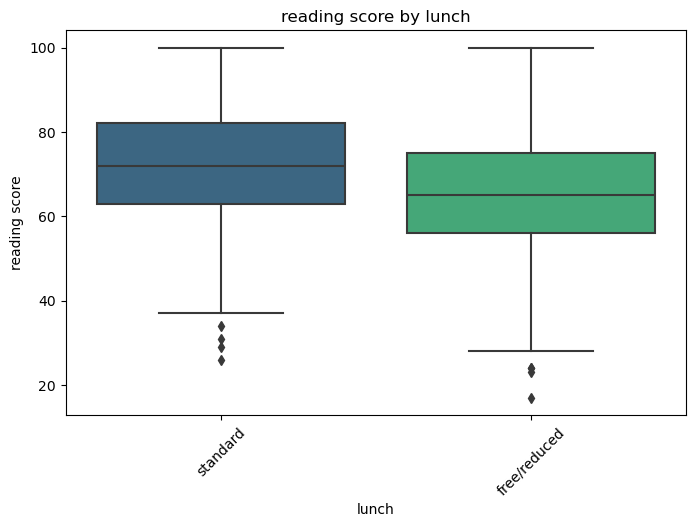

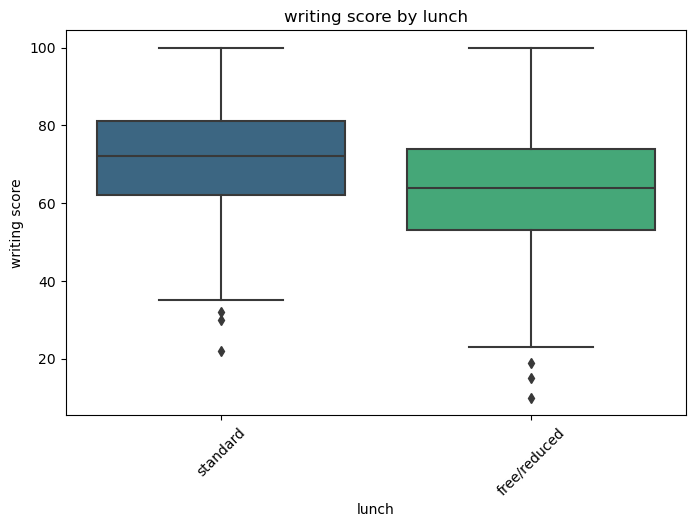

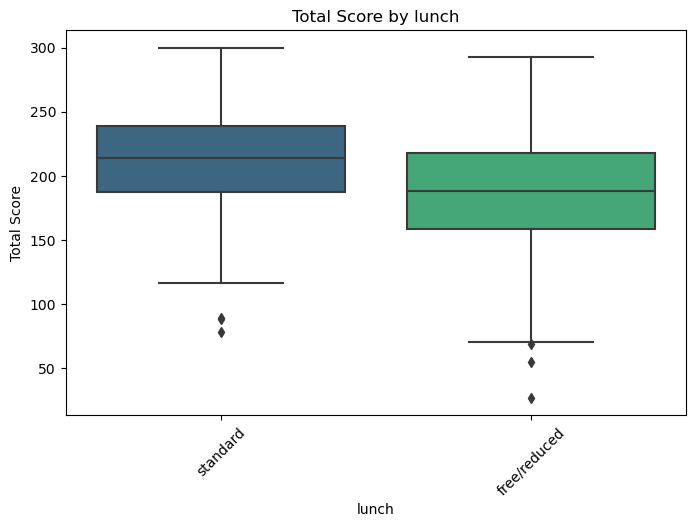

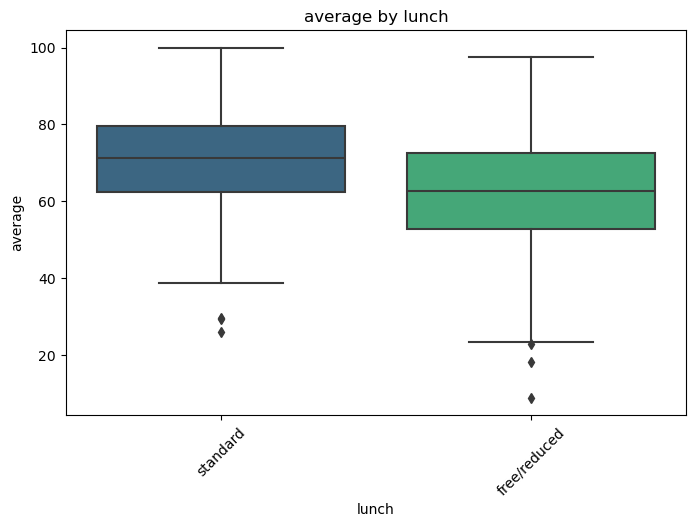

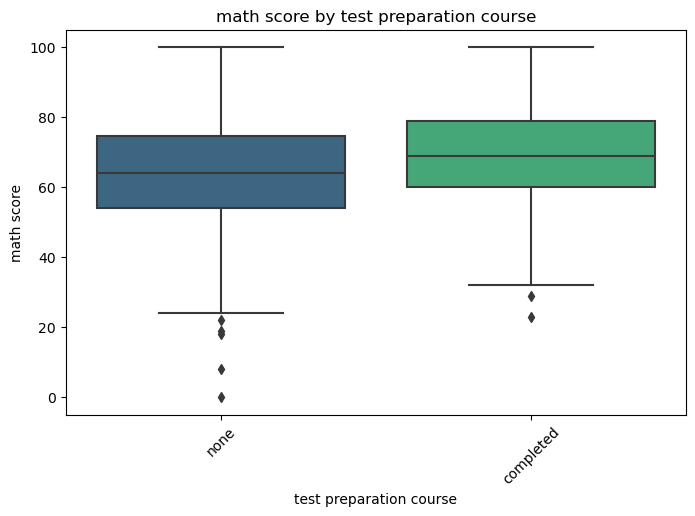

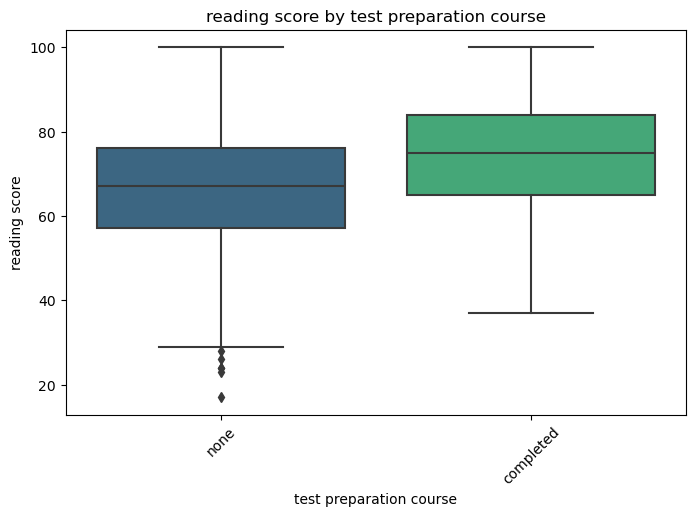

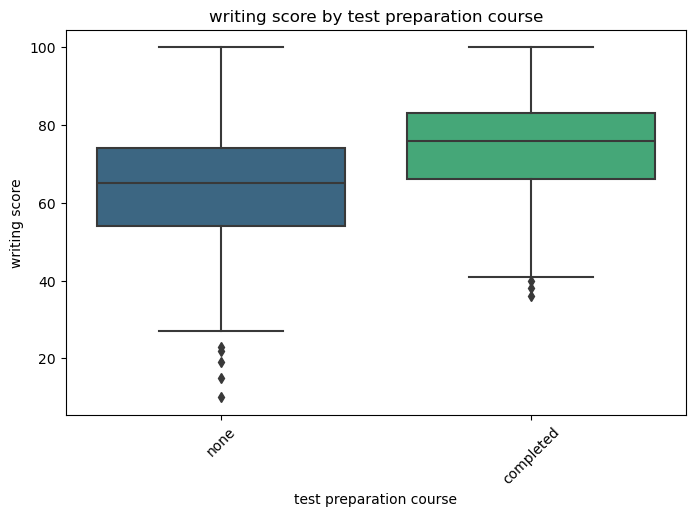

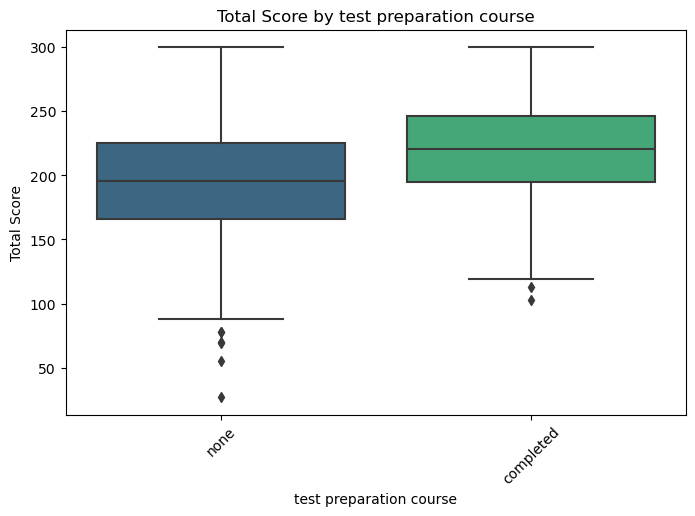

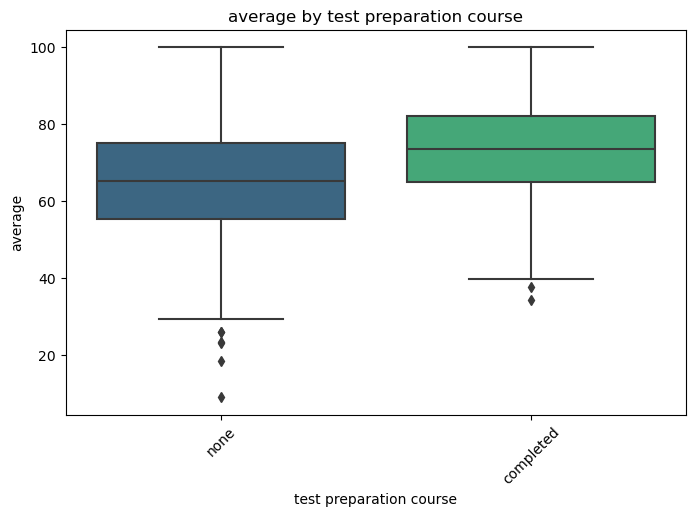

In [28]:
#Categorical vs Numerical (Boxplots)
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for cat_feature in categorical_features:
    for num_feature in numerical_features:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=cat_feature, y=num_feature, palette='viridis')
        plt.title(f'{num_feature} by {cat_feature}')
        plt.xlabel(cat_feature)
        plt.ylabel(num_feature)
        plt.xticks(rotation=45)
        plt.show()

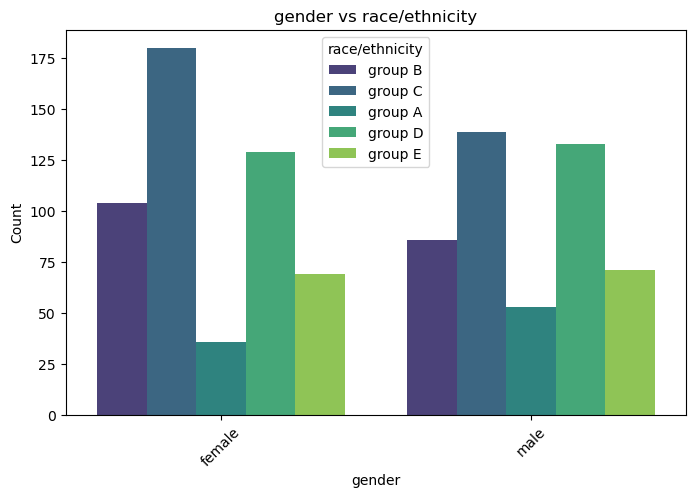

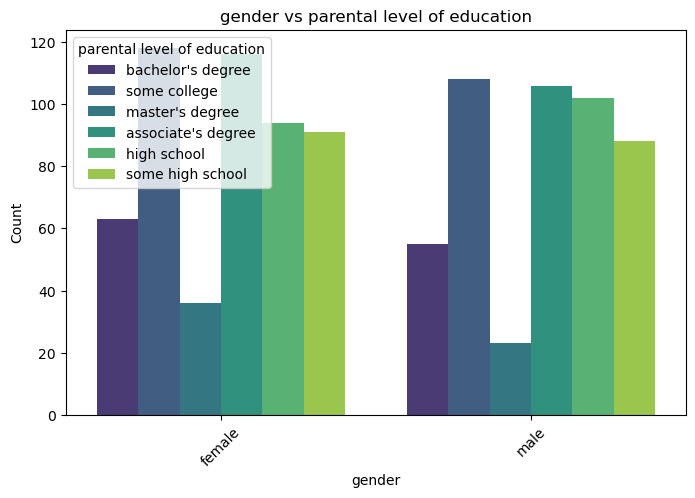

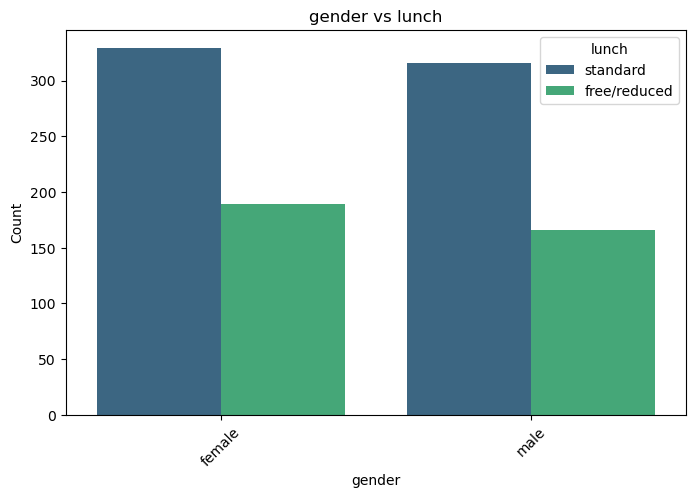

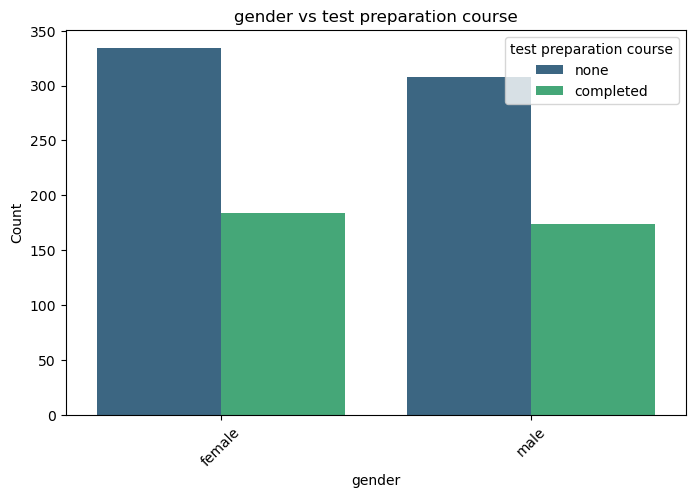

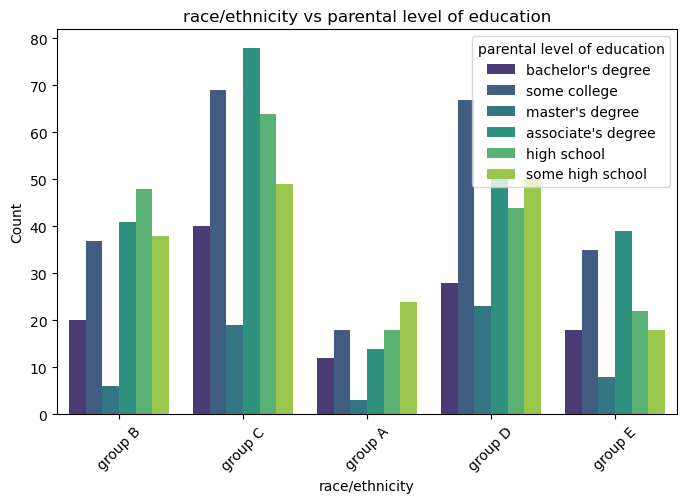

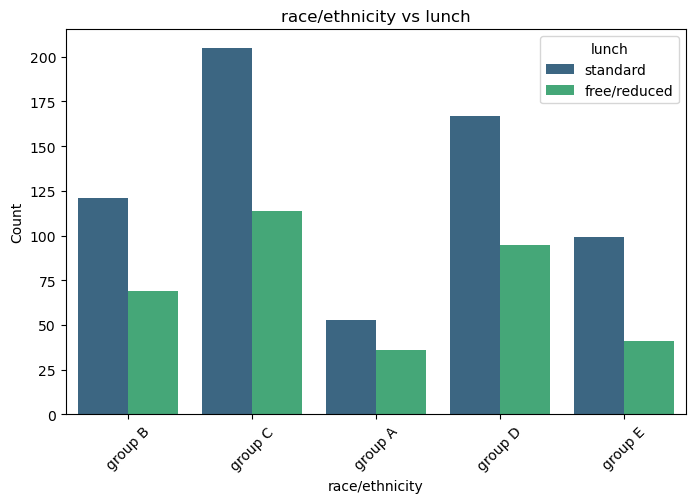

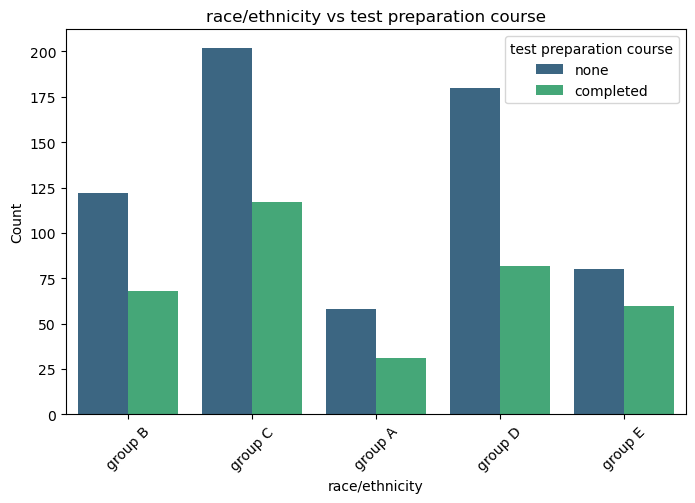

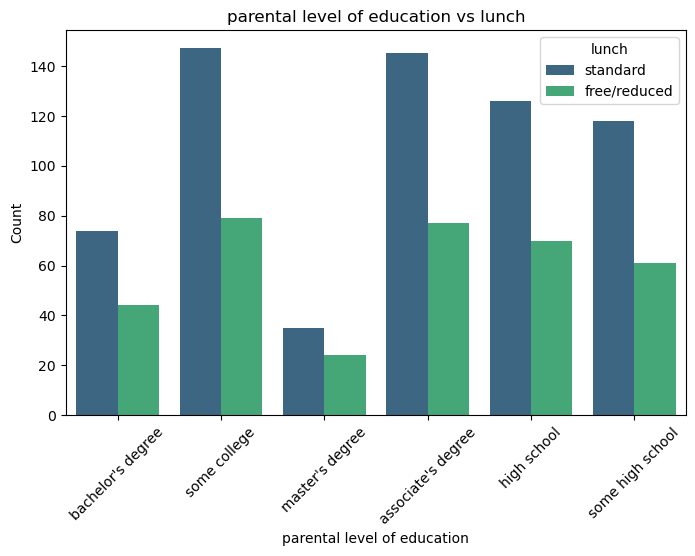

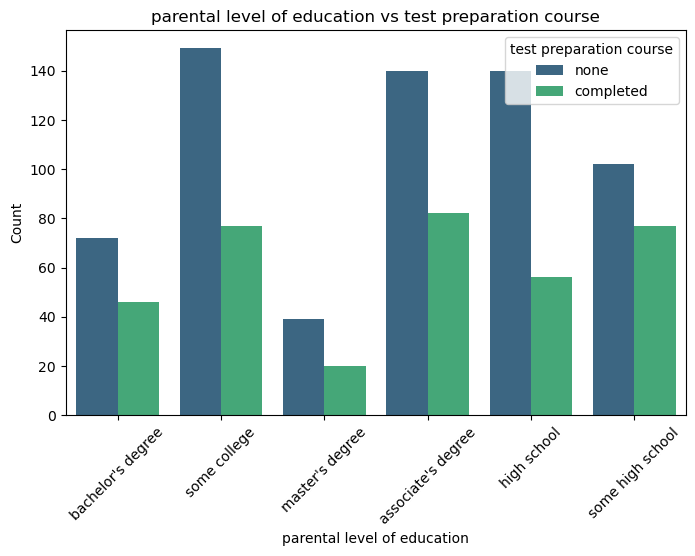

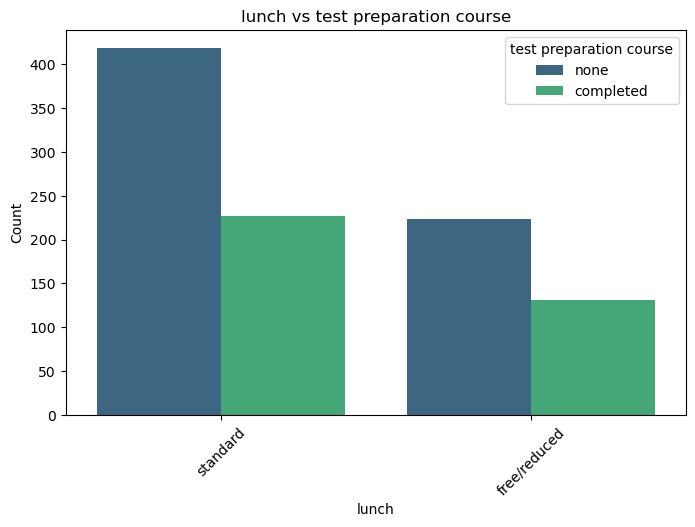

In [29]:
#Categorical vs Categorical (Countplots with hue)
for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=categorical_features[i], hue=categorical_features[j], palette='viridis')
        plt.title(f'{categorical_features[i]} vs {categorical_features[j]}')
        plt.xlabel(categorical_features[i])
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.legend(title=categorical_features[j])
        plt.show()

###### Multivariate Analysis
To perform multivariate analysis, we analyze the relationships among three or more variables simultaneously. Below is the code to generate multivariate analysis using visualizations:

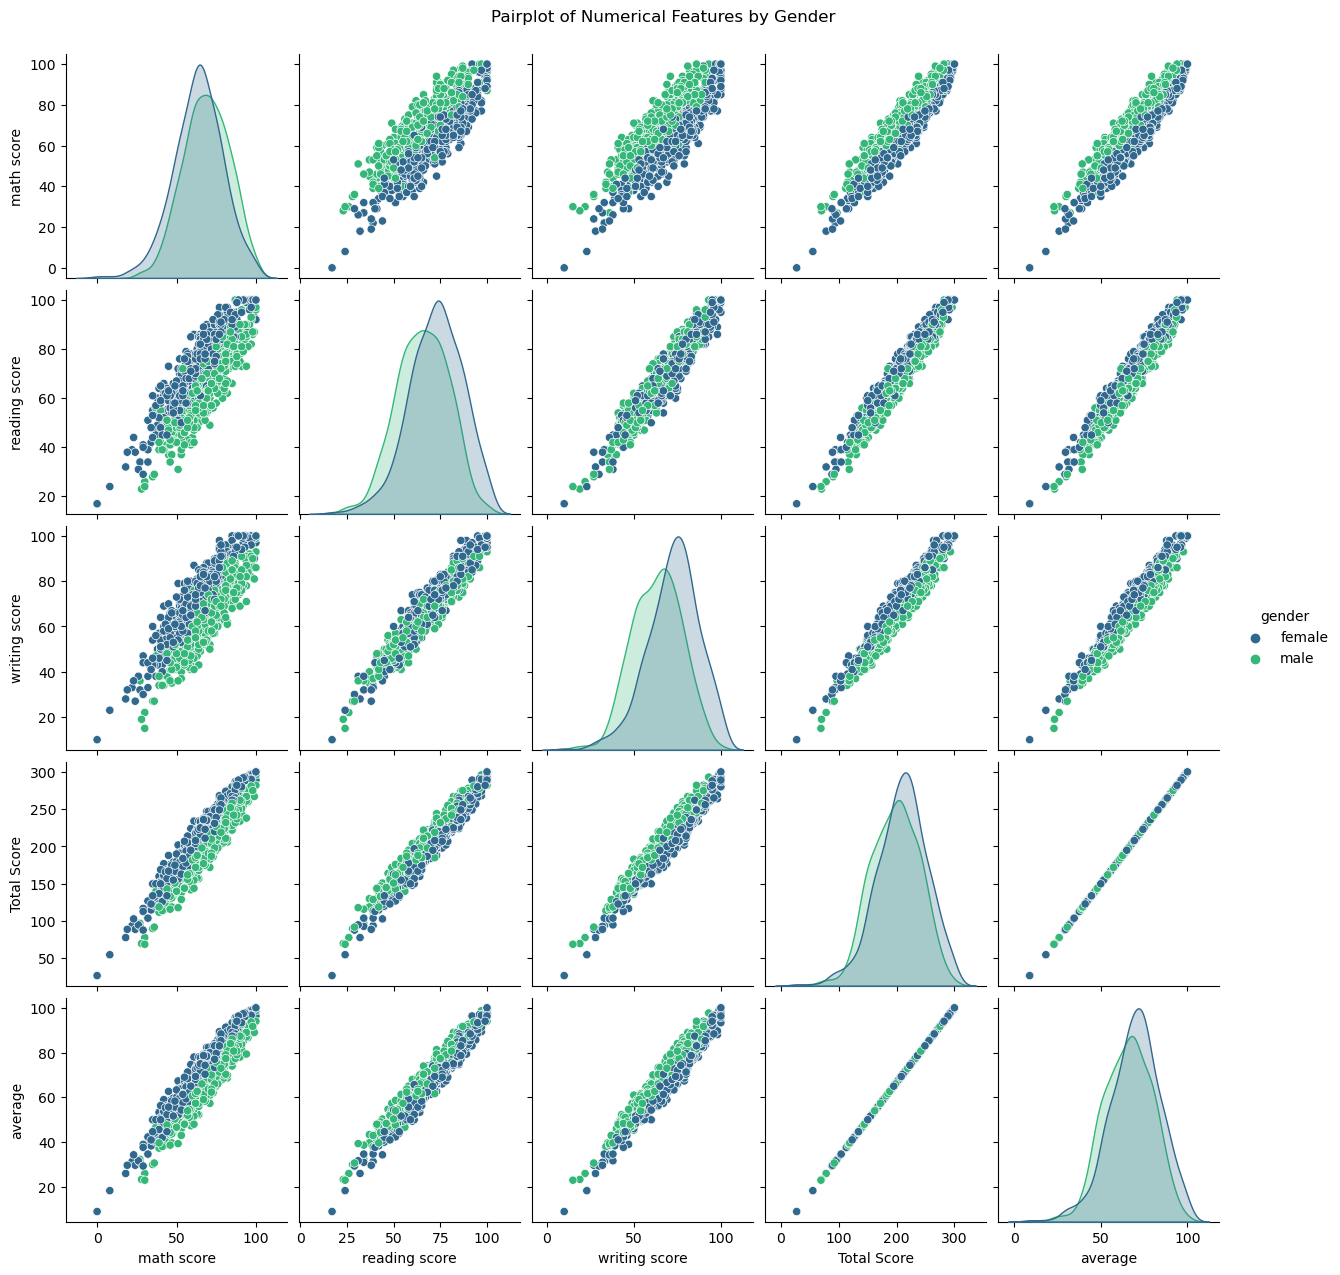

In [30]:
# Pairplot for Numerical Features with Hue
sns.pairplot(df, vars=['math score', 'reading score', 'writing score', 'Total Score', 'average'], hue='gender', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Gender', y=1.02)
plt.show()

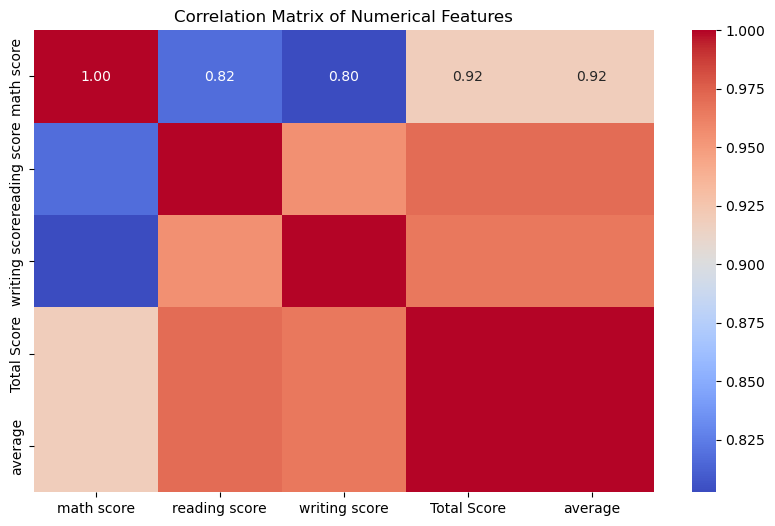

In [31]:
# Heatmap for Correlation Matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df[['math score', 'reading score', 'writing score', 'Total Score', 'average']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


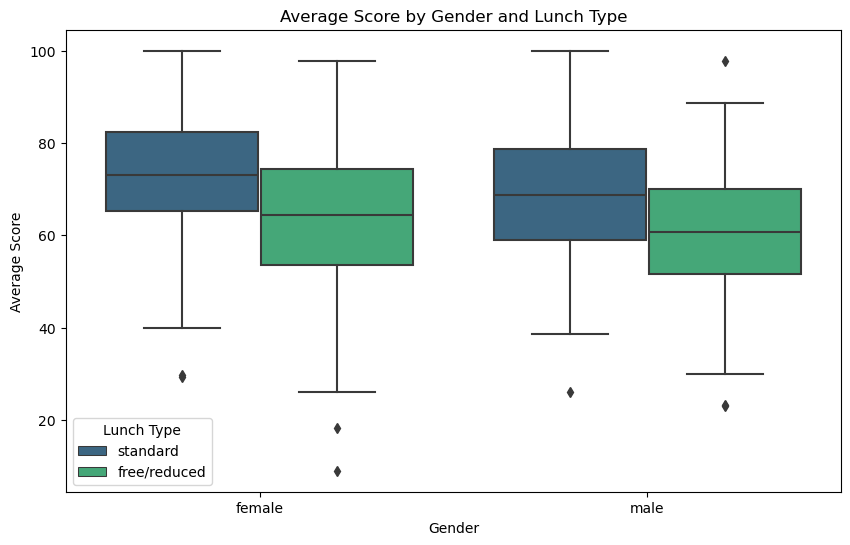

In [32]:
# Boxplot for Numerical Features Grouped by Two Categorical Variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gender', y='average', hue='lunch', palette='viridis')
plt.title('Average Score by Gender and Lunch Type')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.legend(title='Lunch Type')
plt.show()

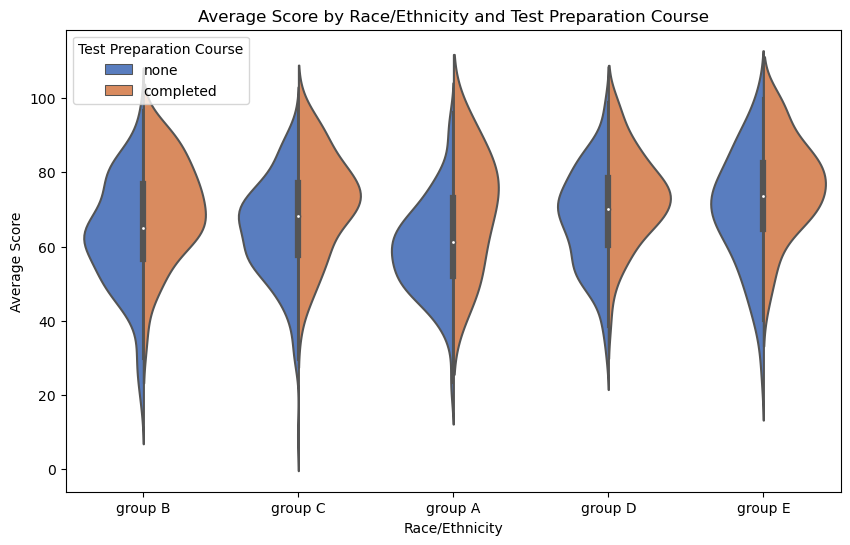

In [33]:
# Violin Plot for Numerical Features Grouped by Two Categorical Variables
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='race/ethnicity', y='average', hue='test preparation course', split=True, palette='muted')
plt.title('Average Score by Race/Ethnicity and Test Preparation Course')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Score')
plt.legend(title='Test Preparation Course')
plt.show()

Explanation:

1. Pairplot:

Visualizes pairwise relationships among numerical features (math score, reading score, writing score, Total Score, and average) with gender as the hue.
Helps identify trends and clusters in the data.

2. Heatmap:

Displays the correlation matrix of numerical features.
Helps identify strong positive or negative correlations among variables.

3. Boxplot:

Compares the distribution of average scores grouped by two categorical variables (gender and lunch).
Useful for understanding how multiple categories interact.

4. Violin Plot:

Combines a boxplot and KDE to show the distribution of average scores grouped by race/ethnicity and test preparation course.
Highlights the density and spread of the data.